<h1>Kapitel 12 Introduktion till Regression och korrelation</h1>

In [1]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols

# importera palmer penguins
filepath = '..\StatistiskaMetoder\data\penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna() # Plocka bort rader som innehåller NaN

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


<h3>Scatter plot av Flipper Length vs Body Mass</h3>

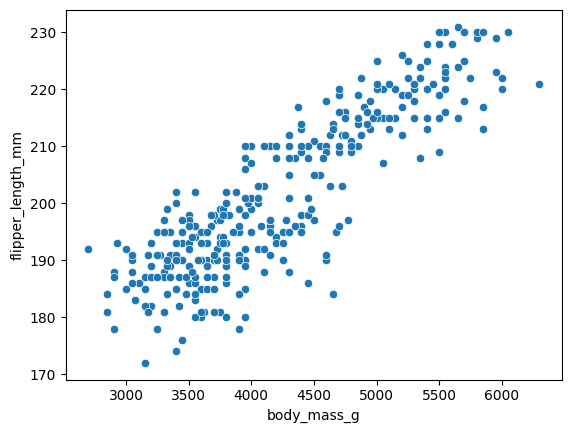

In [3]:
sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
plt.show()

<h3>Gör regression med statsmodels OLS (Ordinary Least Squares)</h3>

In [4]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          3.13e-105
Time:                        14:56:34   Log-Likelihood:                -1112.1
No. Observations:                 333   AIC:                             2228.
Df Residuals:                     331   BIC:                             2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     137.0396      1.999     68.562      

<h3>Korrelation med scipy.stats</h3>

In [5]:
r,p=scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
print(r, p)

0.8729788985653616 3.132836250970993e-105


<h3>In sample-prediktion</h3>

In [6]:
ypred = model.predict(penguins['body_mass_g'])
ypred

0      194.021864
1      194.781627
2      186.424232
4      189.463285
5      192.502337
          ...    
339    197.820680
340    188.703521
341    194.401746
342    199.340207
343    194.401746
Length: 333, dtype: float64

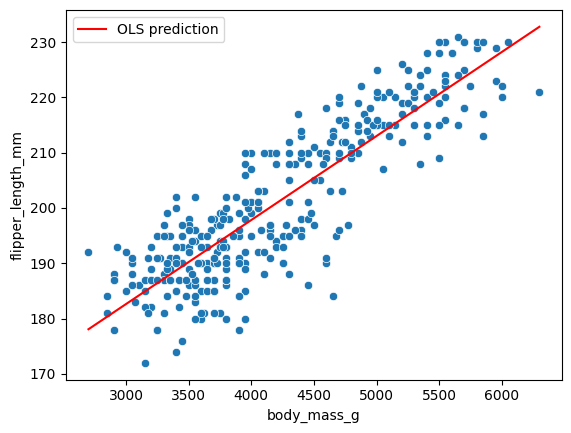

In [7]:
scatterplot = sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')

scatterplot.plot([penguins['body_mass_g'].min(), penguins['body_mass_g'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.show()

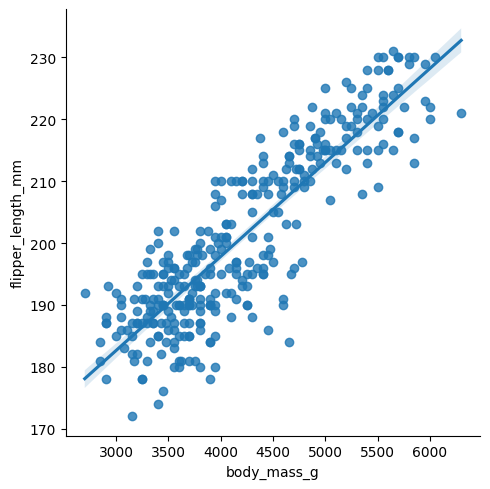

In [8]:
sns.lmplot(data=penguins, x='body_mass_g', y='flipper_length_mm')

<h3>Out of sample-prediktion</h3>

0    243.406475
1    258.601739
2    516.921241
dtype: float64


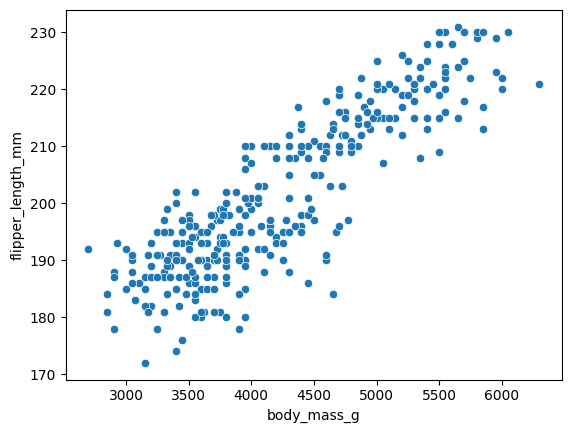

In [9]:
scatterplot = sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')

predictions = pd.DataFrame([7000,8000,25000], columns=['body_mass_g'])
ypred = model.predict(predictions)
print(ypred)

# predictions['pred'] = ypred
# sns.scatterplot(data = predictions, x = 'body_mass_g',y = 'pred')


<h3>Korrelationsmatris och korrelationsplottar</h3>

In [10]:
corr = penguins.corr()
corr

C:\Users\Sam Glass ITHS\AppData\Local\Temp\ipykernel_2608\3376591669.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = penguins.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<AxesSubplot: >

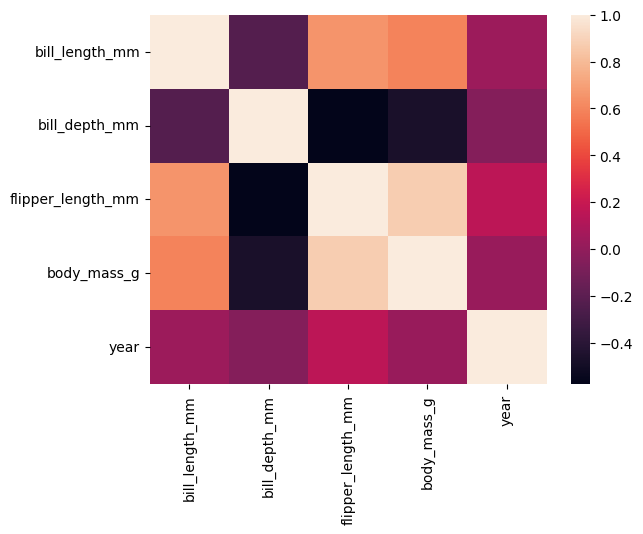

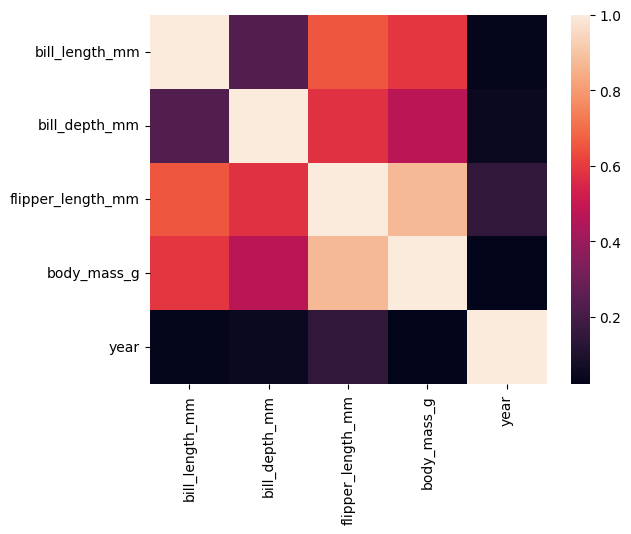

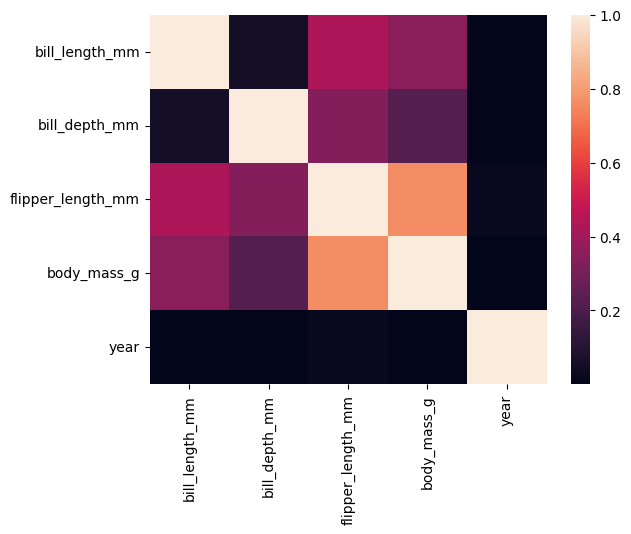

In [11]:
sns.heatmap(corr)
plt.figure()
sns.heatmap(abs(corr))
plt.figure()
sns.heatmap(corr**2) 


C:\Users\Sam Glass ITHS\AppData\Local\Temp\ipykernel_2608\2923971051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = penguins.corr()


<AxesSubplot: >

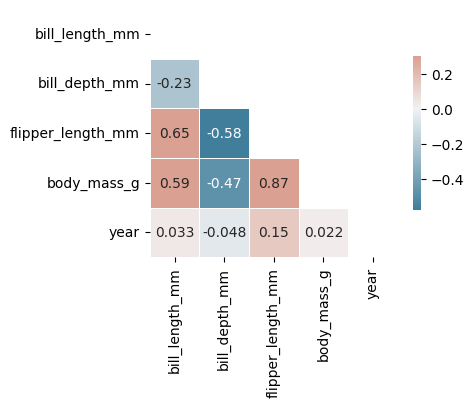

In [12]:
corr = penguins.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<h3>Gör aldrig korrelations-analys utan att undersöka hur data ser ut!</h3>

In [13]:
model = ols('flipper_length_mm ~ bill_depth_mm', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     165.9
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           4.78e-31
Time:                        14:56:38   Log-Likelihood:                -1283.5
No. Observations:                 333   AIC:                             2571.
Df Residuals:                     331   BIC:                             2579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       271.5550      5.517     49.226

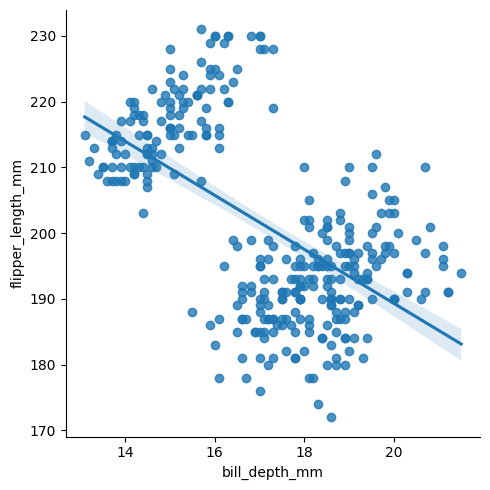

In [14]:
sns.lmplot(data=penguins, y='flipper_length_mm', x='bill_depth_mm')

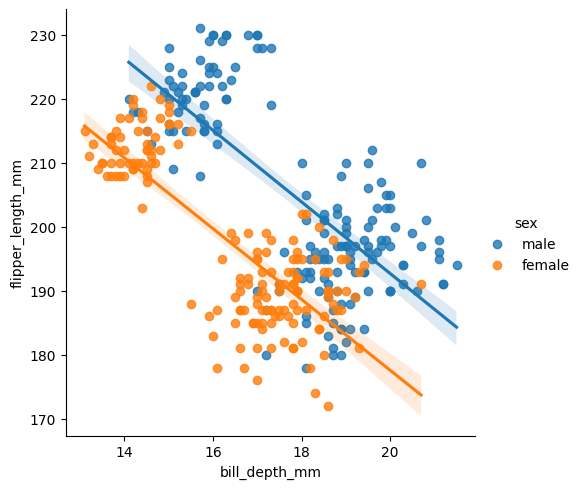

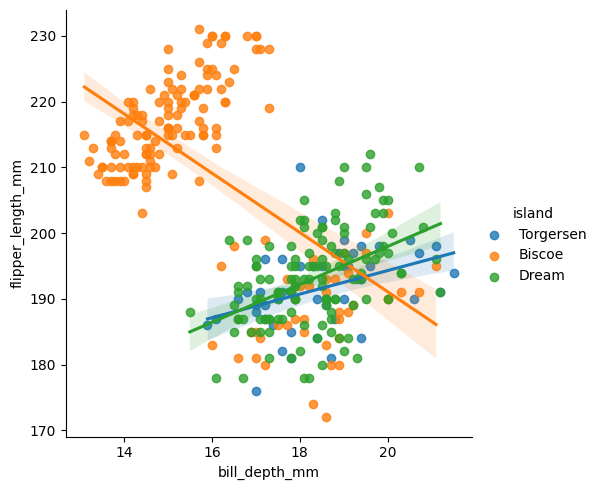

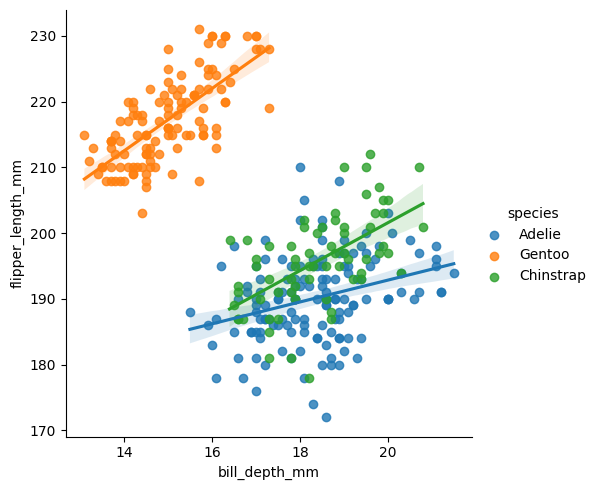

In [15]:
sns.lmplot(data=penguins, y='flipper_length_mm', x='bill_depth_mm', hue='sex')
sns.lmplot(data=penguins, y='flipper_length_mm', x='bill_depth_mm', hue='island')
sns.lmplot(data=penguins, y='flipper_length_mm', x='bill_depth_mm', hue='species')

<h3>Anscombe's Quartet</h3>

In [16]:
anscombe = pd.read_csv('..\StatistiskaMetoder\data\\anscombe.csv')

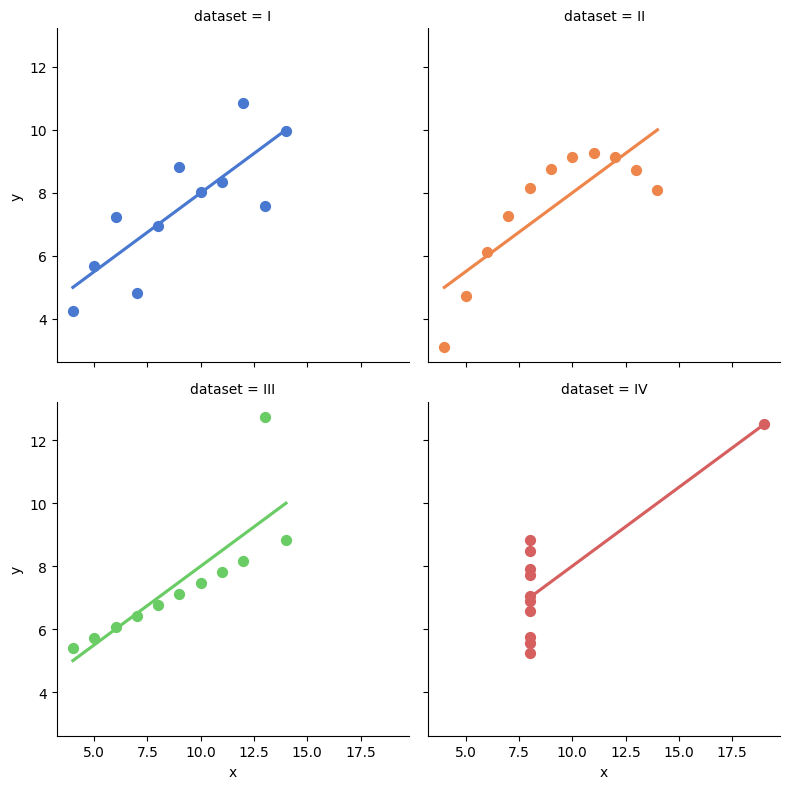

In [17]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)